#### About Fisher's Iris data set
This dataset tabulates paramateres of different flower species along with species names itself. 
Overall dataset has 5 parameters.
#### Load datasets
Use function loadtxt() numpy library to load from csv file. 
Note that one of the parameters is a string type, so we have to set dtype to str.
We will require 5 different lists that store individual property values from the dataset.

In [127]:
import numpy as np

# Addressing a problem with referencing lists and changing them along the way causes cascaded effects
# if referenced list is used again somewhere else
# to make a defensive copies: https://stackoverflow.com/questions/2612802/how-to-clone-or-copy-a-list

data_set = np.loadtxt("datasets/IRIS.csv", dtype = str, delimiter = ",", unpack = True)#
tr_data = data_set.transpose()

sepal_length, sepal_width, petal_length, petal_width, species = list(data_set) # create copy of each list in data_set

#print("Species: ", species)
#print("Petal length", petal_length)


#### Simple data plot 
Use matplotlib.pyplot module to plot various data plots.

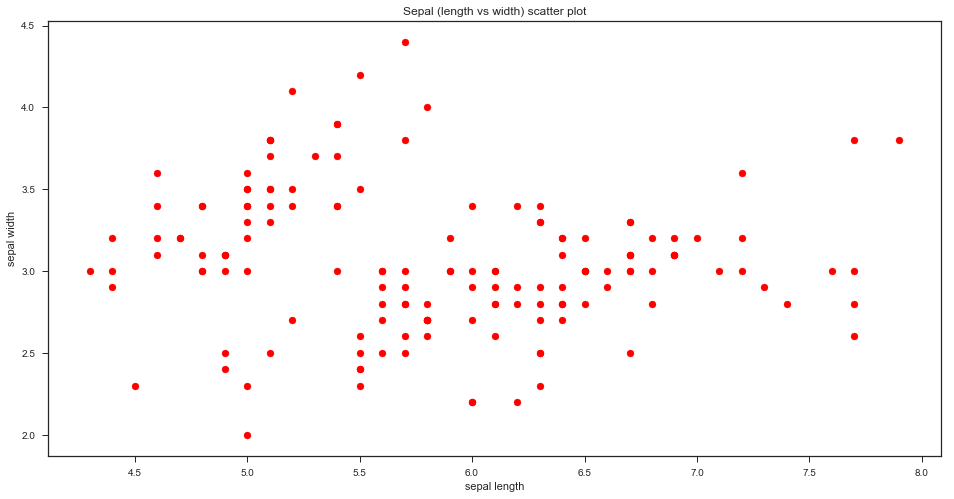

In [128]:
pl.scatter(sepal_length, sepal_width, c = 'red')
pl.xlabel('sepal length')
pl.ylabel('sepal width')
pl.title('Sepal (length vs width) scatter plot')
pl.show()

#### Complex data plot

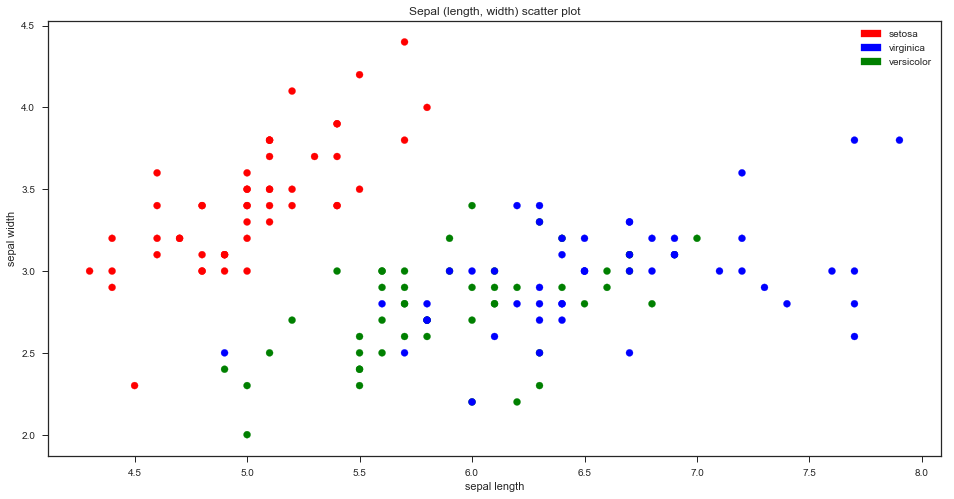

In [129]:
import matplotlib.pyplot as pl

# Make plot a bit bigger
# adapted from https://www.youtube.com/watch?v=Uf2UR9nCyVY&feature=youtu.be
pl.rcParams['figure.figsize']=(16,8)

# Each point on a graph has a label setosa, versicolor and virginica
# We need to colour each point on the graph based on it's label.
# scatter() function has a parameter for colour where we can specify our colour list. 
# Let's create a copy of the species list and change each label to colour.

_species = list(species)
#print(species)
for index, item in enumerate(_species):
    if 'setosa' == item:
        _species[index] = "red"
    elif 'versicolor' == item:
        _species[index] = "green"
    elif 'virginica':
        _species[index] = "blue"
        
# convert list to arrays 
colours = np.array(_species)
labels = np.array(species)
#print(labels)
#print(_species)

# plots x vs y scatter plot and add colours and labels
pl.scatter(sepal_length, sepal_width, c = colours, label = labels)
#pl.scatter(petal_length, petal_width, c = colours, label = labels)
pl.xlabel('sepal length')
pl.ylabel('sepal width')

# How to match colours to a labels?
# Adopted from https://stackoverflow.com/questions/44164111/setting-a-legend-matching-the-colours-in-pyplot-scatter/44164349#44164349
import matplotlib.patches as mpatches
handles = [mpatches.Patch(color=colour, label=label) for label, colour in [('setosa', 'red'), ('virginica', 'blue'), ('versicolor', 'green')]]
pl.legend(handles=handles)
pl.title('Sepal (length, width) scatter plot')
pl.show()

#### Seaborn library

Seaborn python library provides implementation for various complex plots.
As we can see, it takes only few lines to plot data. 

Ref.: [docomentation](http://seaborn.pydata.org/api.html), [tutorial](https://www.datacamp.com/community/tutorials/seaborn-python-tutorial)

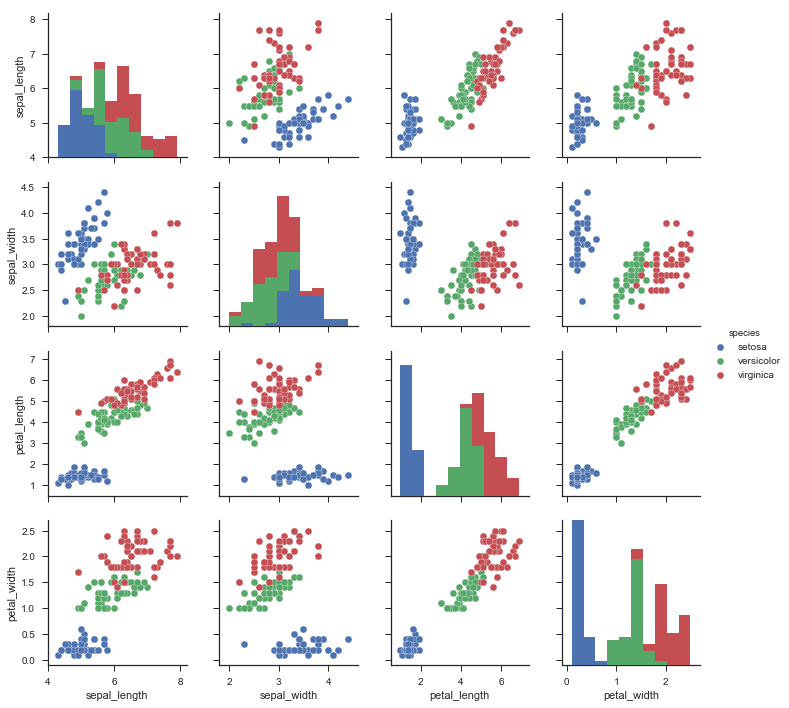

In [130]:
import seaborn as sns
sns.set(style="ticks")

df = sns.load_dataset("iris")
sns.pairplot(df, hue="species")
pl.show()

#### Fit a line on a plot

In Iris dataset we have a ratio of two values, petal's length and width.
We want to find a perfect width for the length of the petal from all the samples we got.
To do this, we need to apply a model for the data.
If we plot a scatter plot from petal length and width data readings,
we can see that a straight line seems to be appropriate data model. 

Using equation of the line, $y = mx + c$, we can find a perfect fit line for our data.

We already have y and x as length and width of the petal. 
To get m and c, we use polyfit function from numpy.

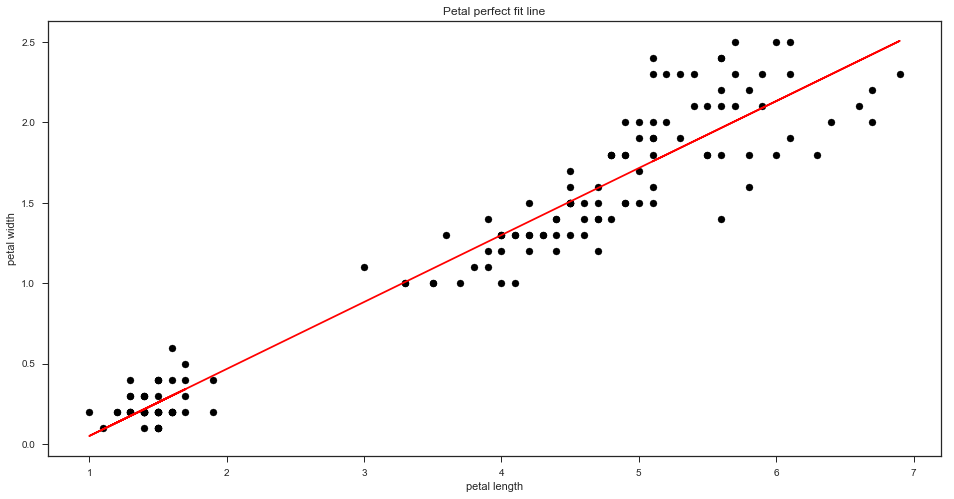

In [131]:
# convert arrays of str into type of floats
petal_length = np.array(petal_length).astype(np.float)
petal_width = np.array(petal_width).astype(np.float)
# obtain missing values of the equation for line fitting
m , c = np.polyfit(petal_length, petal_width, 1)

# scatter points on plot
pl.scatter(petal_length, petal_width, c = 'black' )
# fit a line to a plot using y and  mx + c
pl.plot(petal_length, m * petal_length + c, 'r-')

pl.xlabel('petal length')
pl.ylabel('petal width')
pl.title('Petal perfect fit line')
pl.show()

#### Calculate the R-squared value

In [132]:
# ref. https://en.wikipedia.org/wiki/Coefficient_of_determination
# Coefficient of Correllation predicts the value of future outcome based on related information.
# "One class of such cases includes that of simple linear regression where r2 is used instead of R2. 
# When an intercept (i.e., c) is included then r2 is simply the square of the sample correlation coefficient (i.e., r) 
# between the observed outcomes and the observed predictor values. "

# numpy has a function to calculate R-squared
rsq = np.corrcoef(petal_length, petal_width)[0][1]**2
print("The R-squared value is ", rsq)

The R-squared value is  0.926901227922


#### Fit a line for Setosa species 

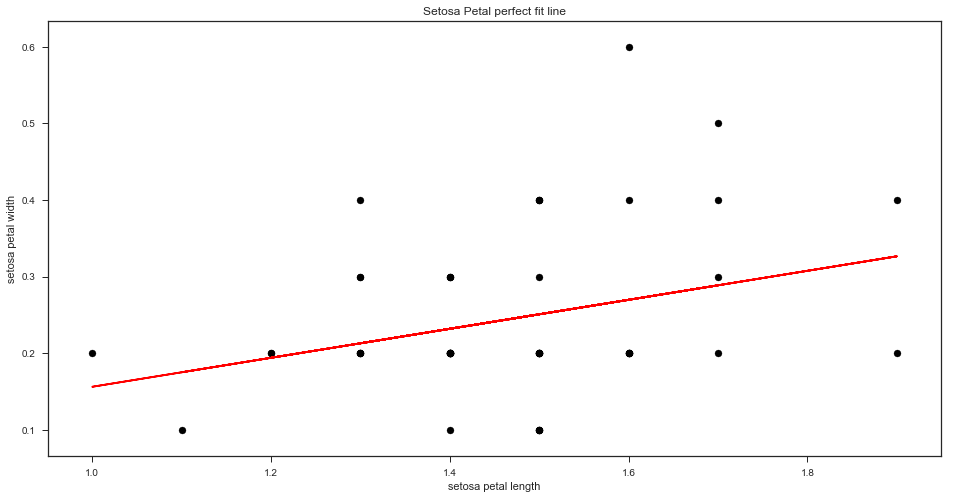

In [133]:
temp = np.array(tr_data) # get data list copy as array 

# we need to filter temp for setosa values
# setosa = [row for row in temp if 'setosa' == row[4]] # doesnt work as intended
# setosa = filter(lambda x: x[4] == 'setosa', temp) # nope

# ref.: http://python-astro.blogspot.ie/2012/05/playing-with-arrays-slicing-sorting.html
# where() function accepts boolean expressions and if true, we place this row into list
setosa = temp[np.where(temp[:,4] == 'setosa')]
# load length and width data for setosa species 
setosa_petal_length = np.array(setosa[:,2]).astype(np.float)
setosa_petal_width = np.array(setosa[:,3]).astype(np.float)

#print(setosa)
# get best m and c for equation of the line
m , c = np.polyfit(setosa_petal_length, setosa_petal_width, 1)
# plot data and fit the line 

# scatter points on plot
pl.scatter(setosa_petal_length, setosa_petal_width, c = 'black' )
# fit a line to a plot using y and  mx + c
pl.plot(setosa_petal_length, m * setosa_petal_length + c, 'r-')

pl.xlabel('setosa petal length')
pl.ylabel('setosa petal width')
pl.title('Setosa Petal perfect fit line')
pl.show()

#### Calculate R-Squared value for Setosa Species

In [134]:
rsq = np.corrcoef(setosa_petal_length, setosa_petal_width)[0][1]**2
print("The R-squared value is ", rsq)

The R-squared value is  0.0938247202228


#### Using gradient descent to fit a line

Code adapted from https://emerging-technologies.github.io/

We can use gradient descent to fit the line by guessing of a parameter and iteratively improve the guess. 
This approach is simillar to known Newton method, a method for finding successively better approximations.

We are using a cost function on a values to approximate best fit.

m:  0.189262472885  c:  -0.0330802603036


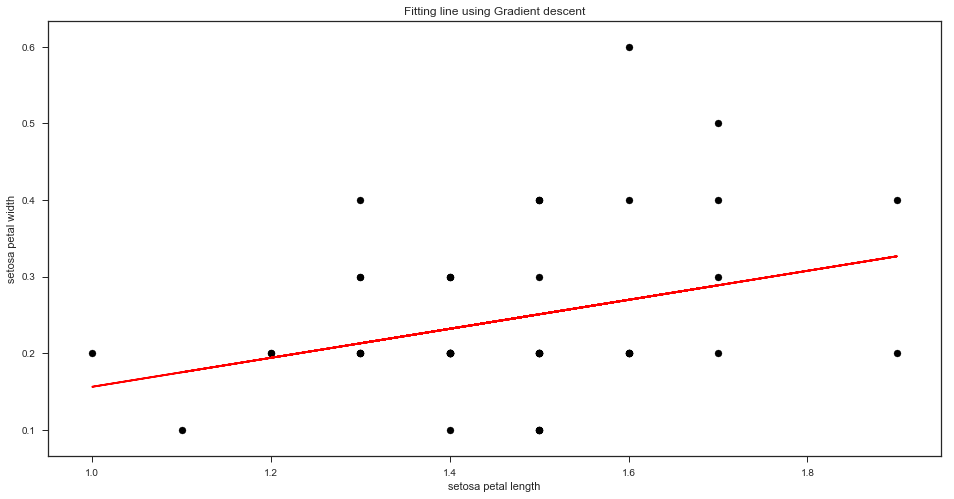

In [141]:
# functions to calculate partial derivatives
def grad_m(x, y, m, c):
  return -2.0 * np.sum(x * (y - m * x - c))

def grad_c(x, y, m , c):
  return -2.0 * np.sum(y - m * x - c)

# itteration 
eta = 0.0001 # 
m, c = 1.0, 1.0 # start of guess values
change = True

while change:
  mnew = m - eta * grad_m(setosa_petal_length, setosa_petal_width, m, c)
  cnew = c - eta * grad_c(setosa_petal_length, setosa_petal_width, m, c)
  if m == mnew and c == cnew:
    change = False
  else:
    m, c = mnew, cnew
    #print("m: %20.16f  c: %20.16f" % (m, c))
    
pl.scatter(setosa_petal_length, setosa_petal_width, c = 'black')
pl.plot(setosa_petal_length, m * setosa_petal_length + c, 'r-')

print("m: ", m," c: ",c)
pl.xlabel('setosa petal length')
pl.ylabel('setosa petal width')
pl.title('Fitting line using Gradient descent')
pl.show()